Causal Impact
----

## 문서 목적
시계열 데이터를 다루는 여러 가지 방법 중 하나를 학습하기 위해 작성하였습니다.

~~어렵다...어려워 ~~ 모르면 공부해야지!~~

## 학습 배경
새롭게 일을 시작하면서 업무 기록 중 시계열 데이터를 다룬 것을 확인 하였고, 그 중 하나의 방법을 알게 되었습니다.

## Causal Impact 란?
Python causal impact (or causal inference) implementation of Google's model with all functionalities fully ported and tested.
- 원래는 R로 이루어진 라이브러리 : https://github.com/google/CausalImpact
- Google 에서 만들었다고 함


## How it works

알고리즘의 목표
- 예상 시계열 데이터와 관측된 시계열 데이터 간의 차이를 분석
- 주어진 intervation(개입? 조치?)이 일부 반응 변수에 미치는 효과를 추론하는 것

> The main goal of the algorithm is to infer the expected effect a given intervention (or any action) had on some response variable by analyzing differences between expected and observed time series data.


데이터
- Data is divided in two parts

> Data is divided in two parts: the first one is what is known as the "pre-intervention" period and the concept of Bayesian Structural Time Series is used to fit a model that best explains what has been observed. The fitted model is used in the second part of data ("post-intervention" period) to forecast what the response would look like had the intervention not taken place. The inferences are based on the differences between observed response to the predicted one which yields the absolute and relative expected effect the intervention caused on data.

이해 중...

## Video
- Inferring the effect of an event using CausalImpact by Kay Brodersen
  - https://www.youtube.com/watch?v=GTgZfCltMm8

## Reference
- http://doc.mindscale.kr/blog/2016/3/11/causal-impact/~

## Installation

In [2]:
# !pip install pycausalimpact

## Example Code 1 - Simple

In [3]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact

In [5]:
np.random.seed(12345)

In [7]:
ar = np.r_[1, 0.9]
ar

array([1. , 0.9])

In [9]:
ma = np.array([1])
ma

array([1])

In [11]:
arma_process = ArmaProcess(ar, ma)
arma_process

ArmaProcess([1.0, 0.9], [1.0], nobs=100) at 0x1c2188fef0

In [12]:
X = 100 + arma_process.generate_sample(nsample=100)
y = 1.2 * X + np.random.normal(size=100)

In [13]:
X

array([ 99.79529234, 100.66318023,  98.88369908, 100.44894053,
       101.5617341 ,  99.98784514, 100.10384725, 100.18828363,
       100.5995673 , 100.70682417, 100.37104761,  98.36983604,
       101.74213919,  98.6609876 , 102.55802799,  98.58420415,
        99.27257896, 100.2828364 , 101.41447255,  98.28840497,
       101.00069408,  99.57636034, 103.63021962,  95.71157482,
       103.28249536,  97.16987545, 102.84972565,  97.95901898,
       101.8378232 ,  99.68976892,  99.56566399,  99.55974887,
        98.02599436,  99.91584429,  99.21498274, 101.26666082,
        97.59407077, 102.28516343,  96.87984046, 103.1410263 ,
        94.81365752, 104.46816527,  94.43665573, 104.03627394,
        95.06032321, 104.73205886,  96.11913114, 102.73889544,
        97.86627975, 103.27009044,  97.1267953 , 102.83255834,
        97.43883589, 103.30985929,  98.34832125, 100.56724932,
        97.94036918, 101.87585234,  99.07009604, 100.17638924,
       100.70382977,  99.3565213 , 100.62914018, 100.10

In [14]:
y

array([118.18869351, 120.23327609, 118.62777475, 119.60972243,
       121.39150827, 119.94915033, 121.22000676, 121.20686883,
       120.12999307, 122.42988909, 119.9165223 , 118.50080512,
       123.02053579, 116.82391452, 122.04714661, 117.89821805,
       119.34758161, 120.14600257, 122.36652539, 116.29710115,
       118.94803565, 118.32480019, 124.70987064, 115.55599996,
       123.66442522, 116.46470836, 123.52732801, 116.94427765,
       121.78832343, 119.61071566, 118.2546515 , 117.67085873,
       119.26592944, 120.88802144, 119.51591944, 122.0751474 ,
       118.41960465, 122.30164255, 115.95445827, 124.26802305,
       112.95239799, 126.68236417, 113.83195166, 124.19009105,
       114.25936736, 125.28674538, 115.07066439, 123.2695331 ,
       118.11985645, 124.55962088, 115.79497785, 124.11715585,
       116.62232999, 122.2940409 , 118.44497159, 119.11695933,
       117.16095549, 123.29693534, 120.10406961, 119.96396797,
       120.42836359, 119.11107856, 118.9101806 , 122.19

In [15]:
y[70:] += 5

In [16]:
y

array([118.18869351, 120.23327609, 118.62777475, 119.60972243,
       121.39150827, 119.94915033, 121.22000676, 121.20686883,
       120.12999307, 122.42988909, 119.9165223 , 118.50080512,
       123.02053579, 116.82391452, 122.04714661, 117.89821805,
       119.34758161, 120.14600257, 122.36652539, 116.29710115,
       118.94803565, 118.32480019, 124.70987064, 115.55599996,
       123.66442522, 116.46470836, 123.52732801, 116.94427765,
       121.78832343, 119.61071566, 118.2546515 , 117.67085873,
       119.26592944, 120.88802144, 119.51591944, 122.0751474 ,
       118.41960465, 122.30164255, 115.95445827, 124.26802305,
       112.95239799, 126.68236417, 113.83195166, 124.19009105,
       114.25936736, 125.28674538, 115.07066439, 123.2695331 ,
       118.11985645, 124.55962088, 115.79497785, 124.11715585,
       116.62232999, 122.2940409 , 118.44497159, 119.11695933,
       117.16095549, 123.29693534, 120.10406961, 119.96396797,
       120.42836359, 119.11107856, 118.9101806 , 122.19

In [17]:
data = pd.DataFrame({'y': y, 'X': X}, columns=['y', 'X'])
pre_period = [0, 69]
post_period = [70, 99]

In [19]:
data.head(10)

,y,X
0,118.188694,99.795292
1,120.233276,100.663180
2,118.627775,98.883699
3,119.609722,100.448941
4,121.391508,101.561734
5,119.949150,99.987845
6,121.220007,100.103847
7,121.206869,100.188284
8,120.129993,100.599567
9,122.429889,100.706824


In [20]:
ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
print(ci.summary(output='report'))

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    125.23             3756.86
Prediction (s.d.)         120.39 (0.27)      3611.81 (8.04)
95% CI                    [119.88, 120.93]   [3596.28, 3627.8]

Absolute effect (s.d.)    4.84 (0.27)        145.06 (8.04)
95% CI                    [4.3, 5.35]        [129.06, 160.58]

Relative effect (s.d.)    4.02% (0.22%)      4.02% (0.22%)
95% CI                    [3.57%, 4.45%]     [3.57%, 4.45%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 125.23. By contrast, in the absence of an
intervention, we would have expected an average response of 120.39.
The 95% interval of this counterfactual prediction is [119.88, 120.93].
Subtracting this prediction from t

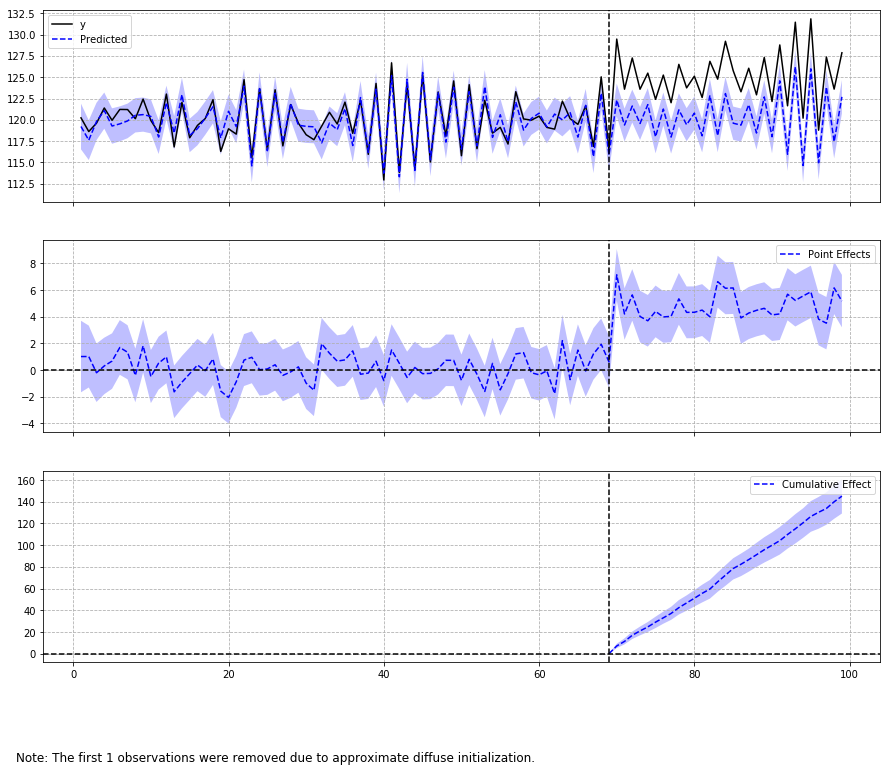

In [22]:
ci.plot()

## Example Code 2(WIP)

학습 할 수 있도록 Jupyter Notebook을 제공하고 있다.
- https://nbviewer.jupyter.org/github/dafiti/causalimpact/blob/master/examples/getting_started.ipynb